# Projeto II - Processamento de Linguagem Natural
* Melissa Junqueira de Barros Lins - 11201920583

## Review de drogas lícitas

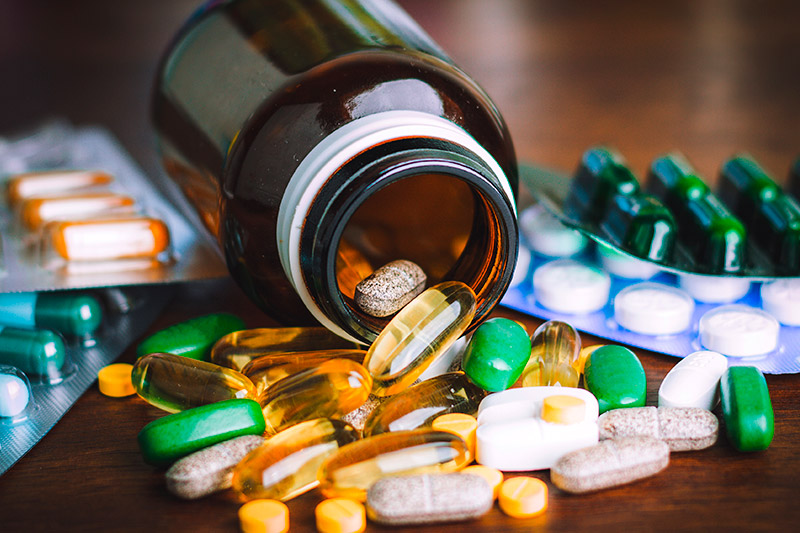

[Dataset Kaggle](https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018?resource=download)

### Sobre o dataset
Este conjunto de dados fornece avaliações de pacientes sobre medicamentos específicos, juntamente com condições relacionadas e uma classificação de 10 estrelas do paciente, refletindo a satisfação geral do paciente. Os dados foram obtidos rastreando sites de revisão farmacêutica online. 

### Descrição dos dados
Os recursos são 'drugName', que é o nome do medicamento, 'condition', que é a condição que o paciente está sofrendo, 'review', é a revisão dos pacientes, 'rating' é a classificação de 10 estrelas do paciente para o medicamento, 'date' é a data da entrada e 'usefulcount' é o número de usuários que acharam a revisão útil.



# Resgate e tratamento dos dados

In [48]:
# Importando bibliotecas
from google.colab import drive

# Montando o drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [145]:
# Importando bibliotecas
import pandas as pd

# Lendo os arquivos e salvando nas variáveis 
df_treino = pd.read_csv("/content/drive/MyDrive/UFABC/2023.1/PLN/Projetos/2/archive/drugsComTrain_raw.csv")

# Imprimindo a tabela
print(df_treino)

        uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

                                                   review  rating       date  \
0      

Nota-se que há um problema na coluna 'review', o ' foi substituído por uma sequência de caracteres `&#039;`. Assim, precisamos tratar esse erro. Também havia valores nulos.

In [50]:
# Tratando o erro de formatação
df_treino['review'] = df_treino['review'].str.replace('&#039;', "'")

# Preenchendo valores nulos com string vazia
df_treino = df_treino.fillna('')

# Análise Exploratória de Dados

In [51]:
# Imprimindo as cinco primeiras linhas
df_treino.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [52]:
# Imprimindo as cinco últimas linhas
df_treino.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I've been on thyroid medication 49 years, I s...",10,19-Sep-15,79
161296,215220,Lubiprostone,"Constipation, Chronic","""I've had chronic constipation all my adult li...",9,13-Dec-14,116


In [53]:
# Verifica valores nulos por coluna
print(df_treino.isnull().sum())

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


In [54]:
# Dados descritos
df_treino.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [55]:
# Agrupando as avaliações por nome da droga e contando quantas avaliações cada droga recebeu
reviews_por_droga = df_treino.groupby('drugName')['drugName'].count()

# Ordenando as drogas pelo número de avaliações em ordem decrescente
top_drogas = reviews_por_droga.sort_values(ascending=False)

# Imprimindo as 10 drogas com mais avaliações
print(top_drogas.head(10))

drugName
Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Name: drugName, dtype: int64


Text(0, 0.5, 'Medicamento')

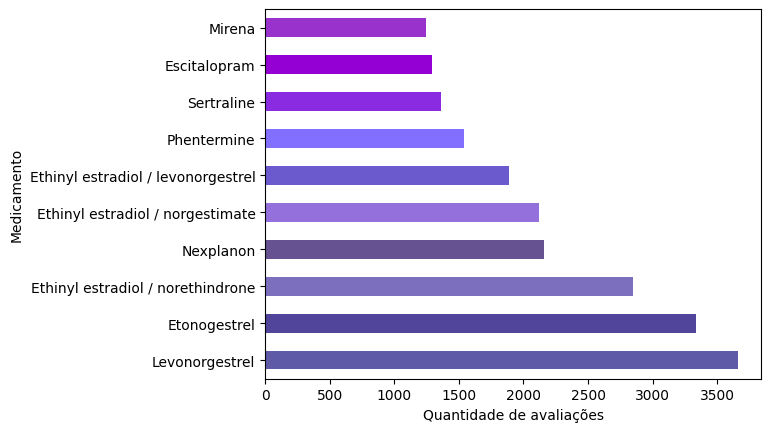

In [56]:
# Importando bibliotecas
import matplotlib.pyplot as plt

# Plotar o gráfico
cores = ['#5E5AA8', '#50459B', '#7B6FBE', '#665191', '#9370DB', '#6A5ACD', '#836FFF', '#8A2BE2', '#9400D3', '#9932CC']
ax = top_drogas.head(10).plot(kind="barh", color=cores)
plt.xlabel("Quantidade de avaliações")
plt.ylabel("Medicamento")

In [57]:
# Agrupando as avaliações por condição e contando quantas avaliações cada condição recebeu
reviews_por_droga = df_treino.groupby('condition')['condition'].count()

# Ordenando as drogas pelo número de avaliações em ordem decrescente
top_drogas = reviews_por_droga.sort_values(ascending=False)

# Imprimindo as 10 drogas com mais avaliações
print(top_drogas.head(10))

condition
Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64


Text(0, 0.5, 'Condição')

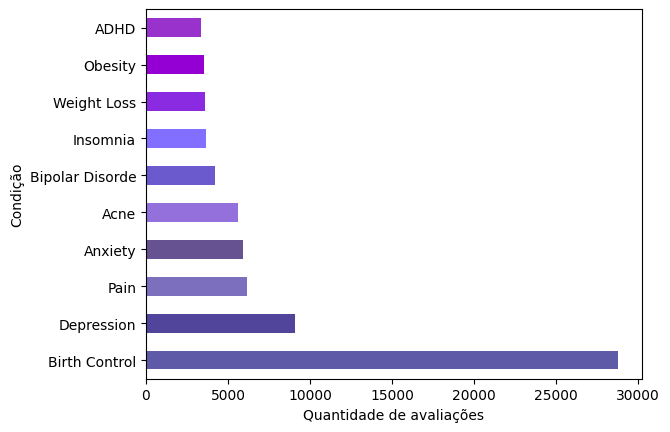

In [58]:
# Plotar o gráfico
cores = ['#5E5AA8', '#50459B', '#7B6FBE', '#665191', '#9370DB', '#6A5ACD', '#836FFF', '#8A2BE2', '#9400D3', '#9932CC']
ax = top_drogas.head(10).plot(kind="barh", color=cores)
plt.xlabel("Quantidade de avaliações")
plt.ylabel("Condição")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


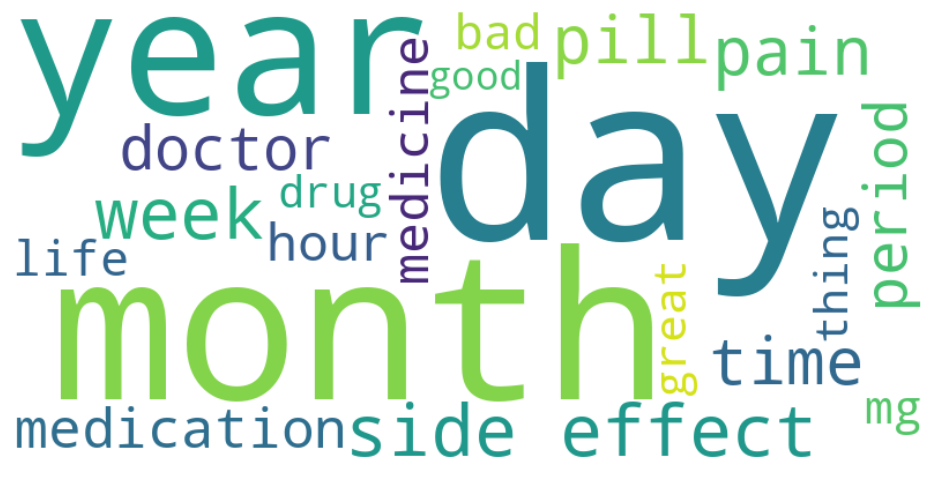

In [59]:
# Nuvem de palavras
# Importando bibliotecas
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

#Número de palavras
n_palavras = 20
    
df = df_treino.sample(frac=0.01, random_state=42)

# Concatena todos os reviews em uma única string
text = ' '.join(df['review'])

# stopwords em inglês
stop_words = stopwords.words('english')

lemmatizer = WordNetLemmatizer()

# Processa o texto com o modelo spaCy
nlp = spacy.load('en_core_web_sm')
nlp.max_length = len(text)
doc = nlp(text)

# Filtra apenas os substantivos, adjetivos e nomes próprios
words = [token.text for token in doc if token.pos_ in ['NOUN', 'ADJ', 'PROPN']]

#words_filtered = [word for word in words if word.isalpha() and word not in stop_words]
words_filtered = [lemmatizer.lemmatize(token) for token in words if token.isalpha() and token.lower() not in stop_words]

# Cria a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=n_palavras).generate(' '.join(words_filtered))

# Exibe a nuvem de palavras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

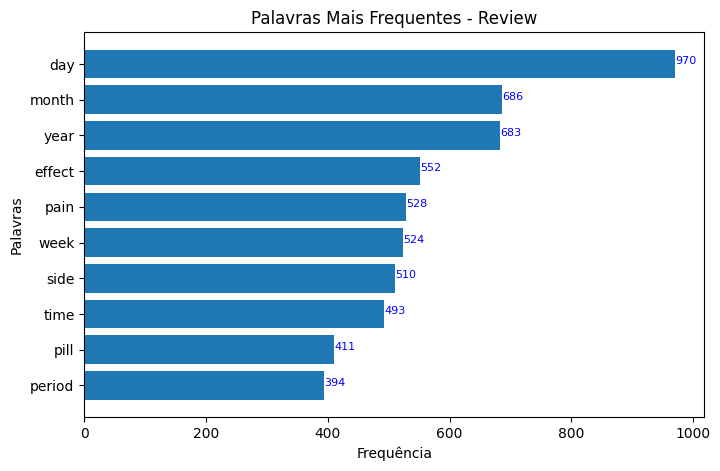

In [60]:
# Importando bibliotecas
from collections import Counter

# Carrega o modelo em inglês do spaCy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# 10 palavras mais frequentes
n = 10
    
# Junta os textos de cada episódio da temporada selecionada
text = df.groupby(['drugName'])['review'].apply(lambda x: ' '.join(x)).reset_index()

# Função para processar o texto e extrair os substantivos, adjetivos e nomes próprios
def extract_nouns_adj(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ in ['NOUN', 'ADJ', 'PROPN']]

# Aplica a função para extrair os substantivos, adjetivos e nomes proprios de cada episódio
text['nouns_adj_propn'] = text['review'].apply(extract_nouns_adj)

# Une as listas de palavras de todos os episódios em uma única lista
words = [word for episode_words in text['nouns_adj_propn'].tolist() for word in episode_words]

# stopwords em inglês
stop_words = stopwords.words('english')

lemmatizer = WordNetLemmatizer()

# Remove as stopwords e lematiza
words_filtered = [lemmatizer.lemmatize(token) for token in words if token.isalpha() and token.lower() not in stop_words]

# Conta as palavras e pega as N mais frequentes
word_freq = dict(Counter(words_filtered).most_common(n))

# Ordena as palavras em ordem decrescente de frequência
word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

# Cria um gráfico de barras das palavras mais frequentes
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(list(word_freq.keys()), list(word_freq.values()))
plt.gca().invert_yaxis()
for i, v in enumerate(word_freq.values()):
  ax.text(v, i, str(v), color='blue', fontsize=8)
plt.title('Palavras Mais Frequentes - Review')
plt.xlabel('Frequência')
plt.ylabel('Palavras')

plt.show()

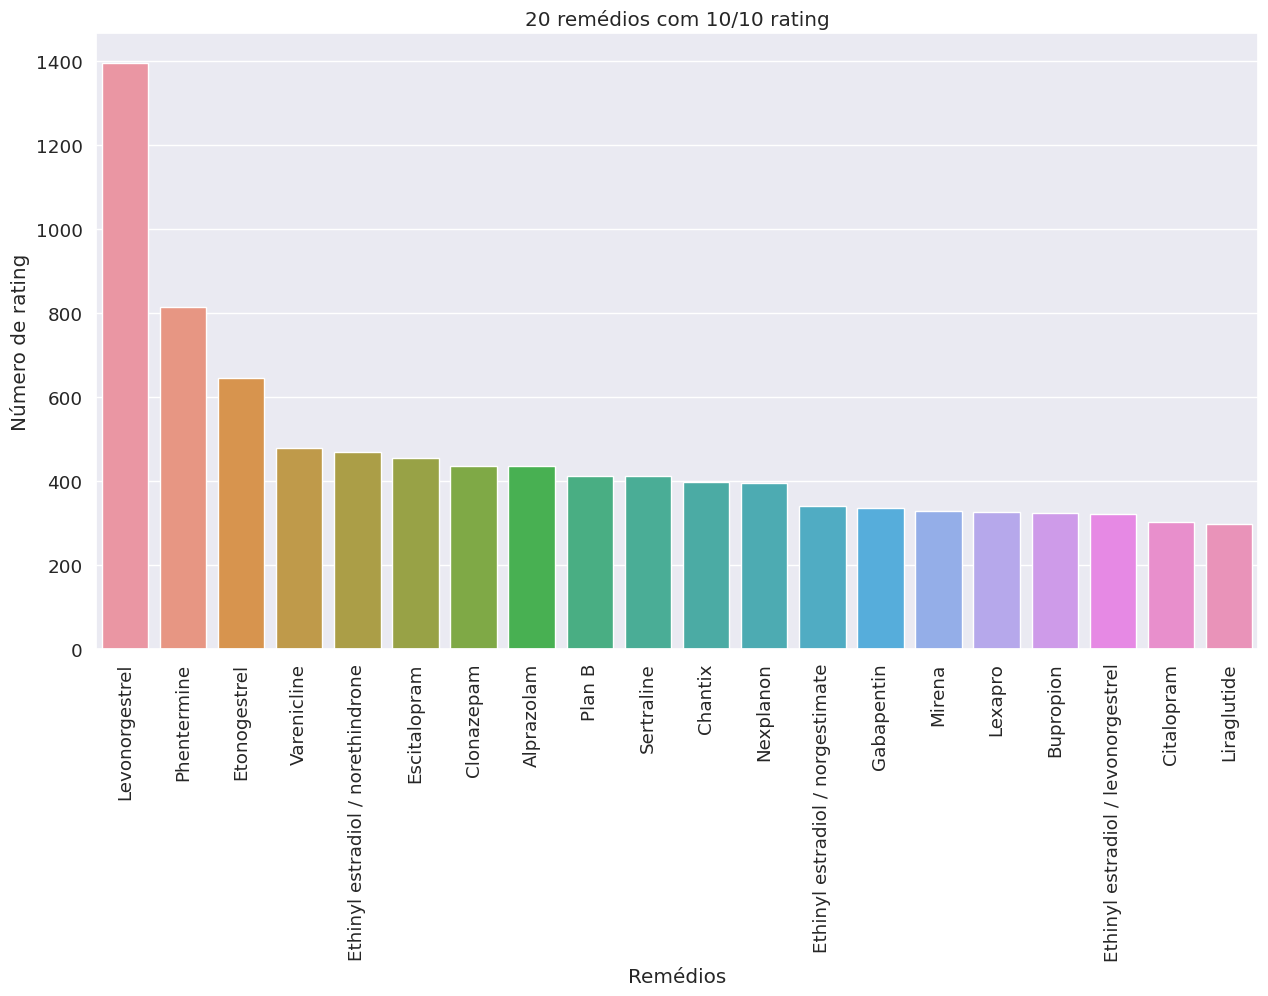

In [61]:
# 20 remédios com avaliação (rating) 10/10
# Importanto bibliotecas
import seaborn as sns

sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_treino.loc[df_treino.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('20 remédios com 10/10 rating')
sns_rating.set_ylabel("Número de rating")
sns_rating.set_xlabel("Remédios")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

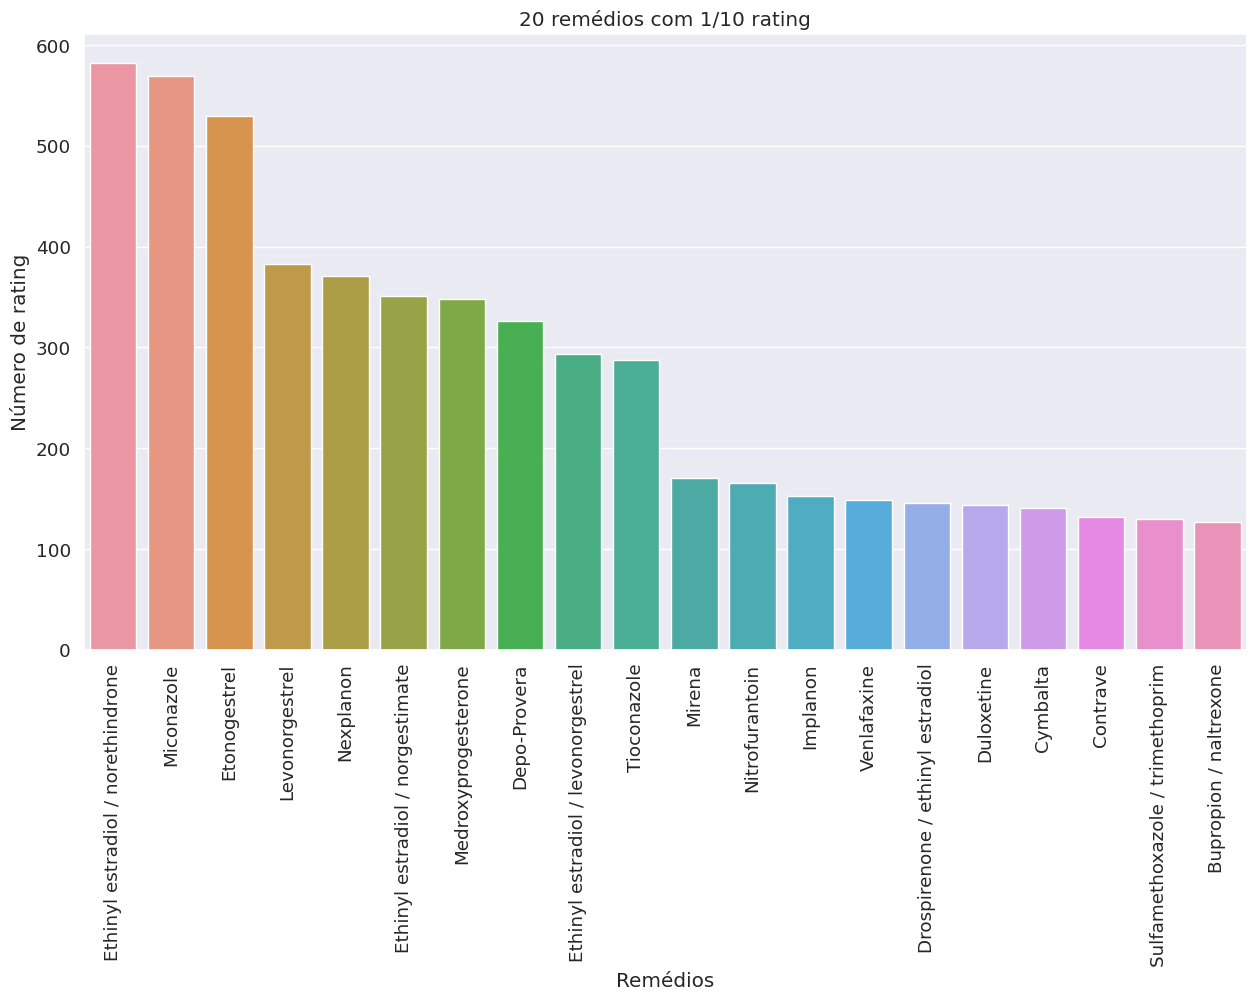

In [62]:
# 20 remédios com avaliação (rating) 1/10

sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_treino.loc[df_treino.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('20 remédios com 1/10 rating')
sns_rating.set_ylabel("Número de rating")
sns_rating.set_xlabel("Remédios")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

# Classificação de Textos
A Classificação de Textos é uma técnica de PLN que consiste em categorizar um texto em uma ou mais classes ou categorias pré-definidas.

## Review para prever a condição

In [63]:
# Importando bibliotecas
import numpy as np
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Remove pontuações e transforma os textos em minúsculas
df_treino['review'] = df_treino['review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_treino['condition'] = df_treino['condition'].apply(lambda x: x.lower())

# Remove as stop words
stop_words = stopwords.words('english')
df_treino['review'] = df_treino['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df_treino['condition'] = df_treino['condition'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Vetoriza os textos com CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_treino['review'])

# Cria o array de categorias
y = df_treino['condition']

# Divide o dataset em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria o classificador Naive Bayes
clf = MultinomialNB()

# Treina o classificador
clf.fit(X_train, y_train)

# Faz a predição no conjunto de teste
pred = clf.predict(X_test)
     
# Calcula as métricas de avaliação
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')

# Imprime as métricas de avaliação
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia: 0.4907625542467452
Precisão: 0.0882691222897793
Recall: 0.030323548185644617
F1-Score: 0.03354293072389196


## Testes manuais
A fim de conferir visualmente a classificação de dados, faremos a seguir alguns testes manuais.

A condição prevista para o review é: Birth Control

In [64]:
# Fazer a predição de um novo texto
texto = "I love this birth control, because I hate having my period. I have been on this pill for three years already and they are the best."

X_new = vectorizer.transform([texto])
y_new = clf.predict(X_new)

print(f"A categoria prevista para o texto é: {y_new[0]}")

A categoria prevista para o texto é: birth control


A condição prevista para o review é: Obsessive Compulsive Disorder

In [65]:
# Fazer a predição de um novo texto
texto = "Saved my life"

X_new = vectorizer.transform([texto])
y_new = clf.predict(X_new)

print(f"A categoria prevista para o texto é: {y_new[0]}")

A categoria prevista para o texto é: depression


A condição prevista para o review é: Bacterial Infection

In [66]:
# Fazer a predição de um novo texto
texto = "This medicine was given to me to treat unknown swelling in the brain. It worked."

X_new = vectorizer.transform([texto])
y_new = clf.predict(X_new)

print(f"A categoria prevista para o texto é: {y_new[0]}")

A categoria prevista para o texto é: pain


A condição prevista para o review é: Anxiety

In [67]:
# Fazer a predição de um novo texto
texto = "This drug did very little for me. My Doctor prescribed it as an alternative to Xanax until a full clinical work up could be done. As a moderate to heavy drinker, he did not advise me that this is used to pull people from the disease. I don't feel like I have issues with alcoholism but it really messed me up when mixing the two. Felt stoned or comatosed. Taking the drug sober did almost nothing anyway except when I take 2 or 3 at a time and still it does not release the anxiety I have."

X_new = vectorizer.transform([texto])
y_new = clf.predict(X_new)

print(f"A categoria prevista para o texto é: {y_new[0]}")


A categoria prevista para o texto é: depression


## Droga para prever condição

In [68]:
# Download dos dados do NLTK
nltk.download('stopwords')

# Remove pontuações e transforma os textos em minúsculas
df_treino['drugName'] = df_treino['drugName'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_treino['condition'] = df_treino['condition'].apply(lambda x: x.lower())

# Remove as stop words
stop_words = stopwords.words('english')
df_treino['condition'] = df_treino['condition'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df_treino['drugName'] = df_treino['drugName'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Vetoriza os textos com CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_treino['drugName'])

# Cria o array de categorias
y = df_treino['condition']

# Divide o dataset em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria o classificador Naive Bayes
clf = MultinomialNB()

# Treina o classificador
clf.fit(X_train, y_train)

# Faz a predição no conjunto de teste
pred = clf.predict(X_test)
     
# Calcula as métricas de avaliação
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')

# Imprime as métricas de avaliação
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia: 0.6598574085554867
Precisão: 0.14476307091825702
Recall: 0.1159053490031866
F1-Score: 0.1169968615657251


## Testes manuais
A fim de conferir visualmente a classificação de dados, faremos a seguir alguns testes manuais.

A condição prevista para o medicamento é: Obsessive Compulsive Disorder

In [69]:
# Fazer a predição de um novo texto
texto = "Fluoxetine"

X_new = vectorizer.transform([texto])
y_new = clf.predict(X_new)

print(f"A categoria prevista para o texto é: {y_new[0]}")

A categoria prevista para o texto é: depression


A condição prevista para o medicamento é: Depression

In [70]:
# Fazer a predição de um novo texto
texto = "Sertraline"

X_new = vectorizer.transform([texto])
y_new = clf.predict(X_new)

print(f"A categoria prevista para o texto é: {y_new[0]}")

A categoria prevista para o texto é: depression


A condição prevista para o medicamento é: Alcohol Dependence 

In [71]:
# Fazer a predição de um novo texto
texto = "Campral"

X_new = vectorizer.transform([texto])
y_new = clf.predict(X_new)

print(f"A categoria prevista para o texto é: {y_new[0]}")

A categoria prevista para o texto é: alcohol dependence


## Droga e Review para prever condição

In [72]:
# Download dos dados do NLTK
nltk.download('stopwords')

# Remove pontuações e transforma os textos em minúsculas
df_treino['drugName'] = df_treino['drugName'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_treino['condition'] = df_treino['condition'].apply(lambda x: x.lower())
df_treino['review'] = df_treino['review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove as stop words
stop_words = stopwords.words('english')
df_treino['condition'] = df_treino['condition'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df_treino['drugName'] = df_treino['drugName'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df_treino['review'] = df_treino['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Vetoriza os textos com CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_treino['drugName'] + ' ' + df_treino['review'])

# Cria o array de categorias
y = df_treino['condition']

# Divide o dataset em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria o classificador Naive Bayes
clf = MultinomialNB()

# Treina o classificador
clf.fit(X_train, y_train)

# Faz a predição no conjunto de teste
pred = clf.predict(X_test)
     
# Calcula as métricas de avaliação
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')

# Imprime as métricas de avaliação
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia: 0.5566026038437694
Precisão: 0.11841648391186708
Recall: 0.043060629002912736
F1-Score: 0.04788193152388247


# Análise de sentimentos


In [73]:
# Importando bibliotecas
!pip install transformers
!pip install transformers[sentencepiece]
from transformers import pipeline

model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [74]:
df = df_treino.sample(frac=0.01, random_state=42)
filtered_df = df[['drugName', 'condition','review', 'rating']]

# Aplica a análise de sentimento em cada review
results = []
for row in filtered_df.itertuples():
    sentiment = classifier(row.review)[0]
    results.append({'drugName': row.drugName, 'condition': row.condition, 'rating': row.rating, 
                    'review': row.review, 'label': sentiment['label'], 'score': sentiment['score']})

new_df = pd.DataFrame(results)

In [75]:
new_df

,drugName,condition,rating,review,label,score
0,Phentermine,weight loss,10,I started taking Phentermine little month ago ...,neutral,0.482180
1,Desvenlafaxine,depression,10,I depression years due situations added contin...,negative,0.431108
2,Leuprolide,endometriosis,8,I actually surprised learn I stage 4 endometri...,neutral,0.469633
3,Zyclara,keratosis,7,Have used one week began serious sideeffects i...,negative,0.753353
4,Diphenhydramine,allergic reactions,10,Experienced allergic reaction dinner new resta...,negative,0.750703
...,...,...,...,...,...,...
1608,Nexplanon,3</span> users found comment helpful.,1,worst thing ever happened decided get heard he...,negative,0.956767
1609,Bupropion naltrexone,weight loss,9,I Contrave since August 2016 To date I lost 45...,negative,0.434325
1610,Flagyl,helicobacter pylori infection,7,I day 7 14 Im Metronidazole Omeprazole amp cla...,negative,0.840874
1611,Lisinopril,high blood pressure,1,Had side effects medicine,neutral,0.614293


In [76]:
def get_sentiment_summary(sentiments_df):
    # Calcula a média dos scores para cada sentimento
    mean_scores = sentiments_df.groupby('label')['score'].mean()
    
    # Verifica qual sentimento teve o maior score médio
    max_sentiment = mean_scores.idxmax()
    
    # Retorna o resultado formatado
    if max_sentiment == 'negative':
        return "NEGATIVO", mean_scores[max_sentiment]
    elif max_sentiment == 'positive':
        return "POSITIVO", mean_scores[max_sentiment]
    else:
        return "NEUTRO", mean_scores['neutral']

def get_sentiment_stats(sentiments_df):
    # Total de frases
    total = len(sentiments_df)
    
    # Total de frases positivas
    pos_count = len(sentiments_df[sentiments_df['label'] == 'positive'])
    
    # Total de frases negativas
    neg_count = len(sentiments_df[sentiments_df['label'] == 'negative'])
    
    # Total de frases neutras
    neu_count = len(sentiments_df[sentiments_df['label'] == 'neutral'])
    
    # Percentual de frases positivas
    pos_perc = round((pos_count / total) * 100, 2)
    
    # Percentual de frases negativas
    neg_perc = round((neg_count / total) * 100, 2)
    
    # Percentual de frases neutras
    neu_perc = round((neu_count / total) * 100, 2)
    
    # Retorna um dicionário com as estatísticas
    return {
        'Total': total,
        'Positivas': pos_count,
        'Negativas': neg_count,
        'Neutras': neu_count,
        '% Positivas': pos_perc,
        '% Negativas': neg_perc,
        '% Neutras': neu_perc
    }

In [77]:
get_sentiment_summary(new_df)

('NEGATIVO', 0.7002413135687018)

In [78]:
get_sentiment_stats(new_df)

{'Total': 1613,
 'Positivas': 254,
 'Negativas': 969,
 'Neutras': 390,
 '% Positivas': 15.75,
 '% Negativas': 60.07,
 '% Neutras': 24.18}

In [79]:
# Analisando rating
filtered_df.loc[(filtered_df['rating'] > 5), 'Review_Sentiment'] = 1 #positive
filtered_df.loc[(filtered_df['rating'] < 5), 'Review_Sentiment'] = 0 #negative
filtered_df.loc[(filtered_df['rating'] == 5), 'Review_Sentiment'] = 0.5 #neutral

filtered_df['Review_Sentiment'].value_counts()

<ipython-input-79-d0b2a7659477>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[(filtered_df['rating'] > 5), 'Review_Sentiment'] = 1 #positive


1.0    1132
0.0     400
0.5      81
Name: Review_Sentiment, dtype: int64

Analisando o rating das avaliações, percebemos que, contrariamente à análise de sentimentos, as notas foram bastante positivas.

In [80]:
ratings_ = df_treino['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/df_treino.shape[0])
print(ratings_)

   rating  counts    percent
0      10   50989  31.611871
1       9   27531  17.068513
2       1   21619  13.403225
3       8   18890  11.711315
4       7    9456   5.862477
5       5    8013   4.967854
6       2    6931   4.297042
7       3    6513   4.037893
8       6    6343   3.932497
9       4    5012   3.107311


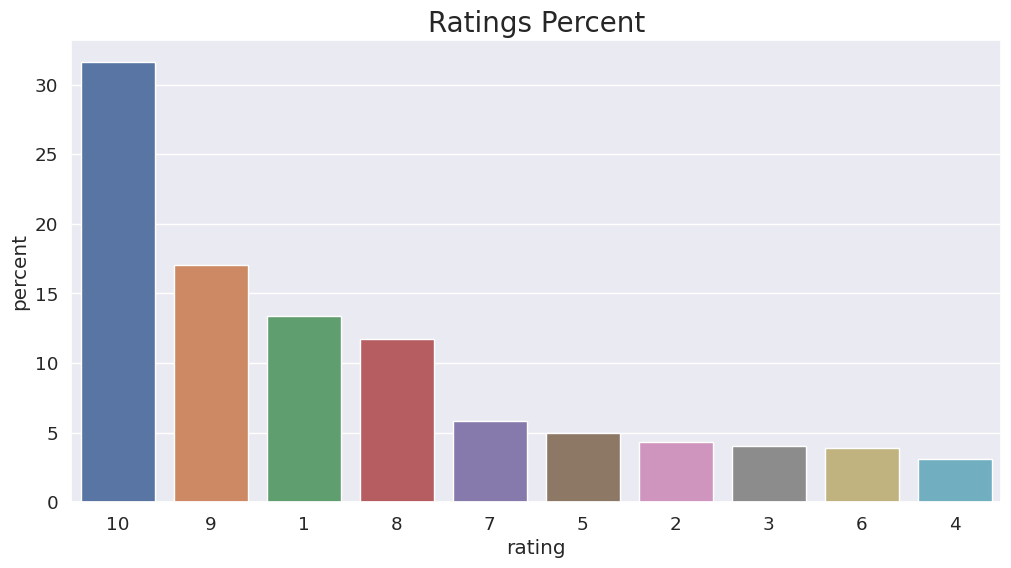

In [81]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]

sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Ratings Percent',fontsize=20)
plt.show()

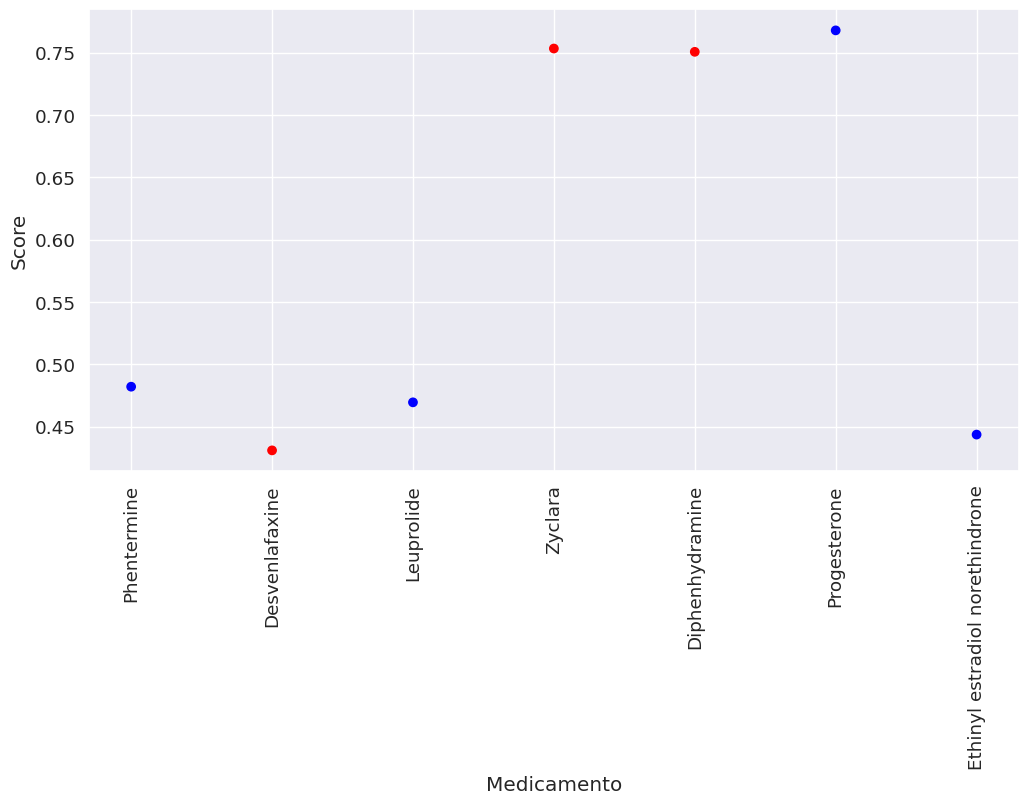

In [82]:
# Mapeia as cores de acordo com o label
colors = {"positive": "green", "negative": "red", "neutral": "blue"}

# Cria o gráfico de dispersão
plt.scatter(new_df["drugName"].head(7), new_df["score"].head(7), c=new_df["label"].head(7).apply(lambda x: colors[x]))

# Adiciona rótulos nos eixos x e y
plt.xlabel("Medicamento")
plt.ylabel("Score")

# Rotaciona os rótulos do eixo x em 90 graus
plt.xticks(rotation=90)

# Exibe o gráfico
plt.show()

<ipython-input-83-a94357e1cc46>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


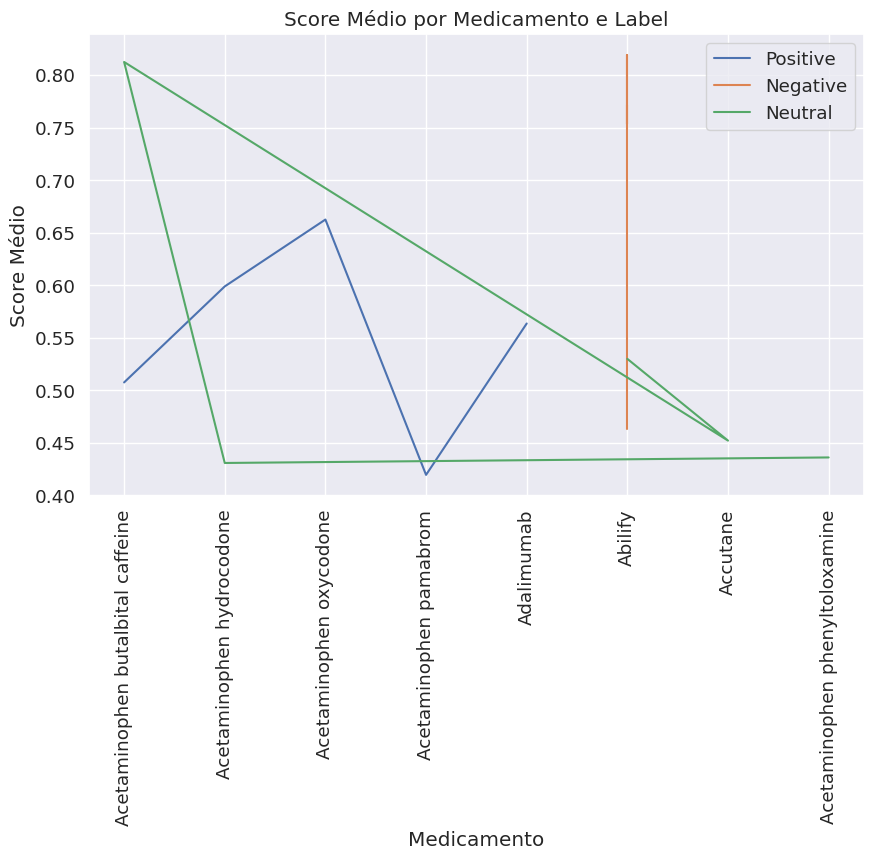

In [83]:
# Cria o gráfico de linhas
# Agrupa os dados por drugName, condition e label, e calcula o score médio de cada grupo
grouped = new_df.groupby(['drugName', 'condition', 'label'])['score'].mean().reset_index()

# Separa os dados em diferentes DataFrames de acordo com o label
positive_scores = grouped[grouped['label'] == 'positive']
negative_scores = grouped[grouped['label'] == 'negative']
neutral_scores = grouped[grouped['label'] == 'neutral']

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(positive_scores['drugName'].head(5), positive_scores['score'].head(5), label='Positive')
ax.plot(negative_scores['drugName'].head(5), negative_scores['score'].head(5), label='Negative')
ax.plot(neutral_scores['drugName'].head(5), neutral_scores['score'].head(5), label='Neutral')

ax.set_xlabel('Medicamento')
ax.set_ylabel('Score Médio')
ax.set_title('Score Médio por Medicamento e Label')
ax.legend()

# rotaciona os rótulos do eixo x em 90 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

<ipython-input-84-490102f708a6>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


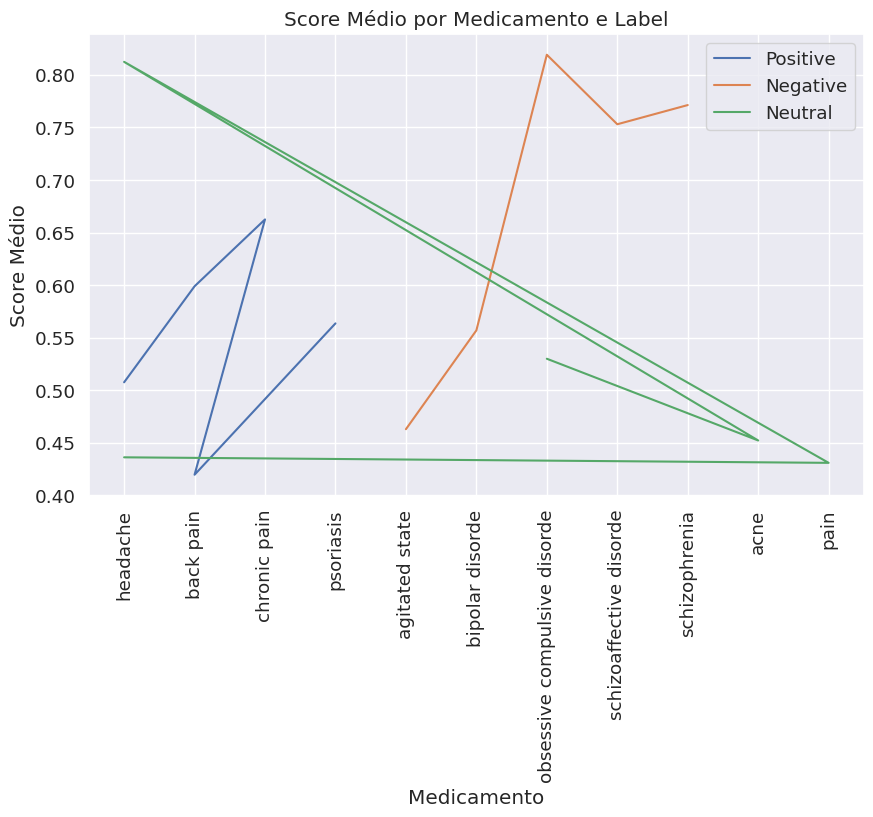

In [84]:
# Cria o gráfico de linhas
# Agrupa os dados por drugName, condition e label, e calcula o score médio de cada grupo
grouped = new_df.groupby(['drugName', 'condition', 'label'])['score'].mean().reset_index()

# Separa os dados em diferentes DataFrames de acordo com o label
positive_scores = grouped[grouped['label'] == 'positive']
negative_scores = grouped[grouped['label'] == 'negative']
neutral_scores = grouped[grouped['label'] == 'neutral']

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(positive_scores['condition'].head(5), positive_scores['score'].head(5), label='Positive')
ax.plot(negative_scores['condition'].head(5), negative_scores['score'].head(5), label='Negative')
ax.plot(neutral_scores['condition'].head(5), neutral_scores['score'].head(5), label='Neutral')

ax.set_xlabel('Medicamento')
ax.set_ylabel('Score Médio')
ax.set_title('Score Médio por Medicamento e Label')
ax.legend()

# rotaciona os rótulos do eixo x em 90 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

# Reconhecimento de Entidades Nomeadas

In [85]:
!python -m spacy download en_core_web_trf

2023-04-30 22:39:16.007576: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.3/460.3 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [138]:
import spacy
import spacy_transformers

nlp = spacy.load("en_core_web_trf")

In [169]:
df = df_treino.sample(frac=0.01, random_state=42)

In [170]:
def extract_named_entitie_with_type_and_freq_drugName(df, drugName,types_entities):
    # Filtra o DataFrame pelo medicamento especificada
    filtered_df = df[(df['drugName'] == drugName)]
    
    # Extrai as avaliações
    transcripts = filtered_df['review'].tolist()
    
    # Processa as falas com o modelo de linguagem do spaCy
    docs = [nlp(transcript) for transcript in transcripts]
    
    # Itera pelas entidades nomeadas e retorna um dicionário com as entidades, seus tipos e suas frequências de ocorrência
    named_entities = {}
    for doc in docs:
        for entity in doc.ents:
            if entity.label_ in types_entities:
                named_entity = entity.text
                named_entity_type = entity.label_
                if named_entity_type not in named_entities:
                    named_entities[named_entity_type] = {}
                if named_entity not in named_entities[named_entity_type]:
                    named_entities[named_entity_type][named_entity] = 1
                else:
                    named_entities[named_entity_type][named_entity] += 1
    
    return named_entities

In [172]:
#Entidades nomeadas com o medicamento Fluoxetine
named_entities = extract_named_entitie_with_type_and_freq_drugName(df, 'Fluoxetine', ['PERSON', 'ORG', 'GPE', 'NORP', 'PRODUCT', 'DATE', 'TIME', 'MONEY', 'QUANTITY'])
named_entities

{'PRODUCT': {'Prozac': 3},
 'DATE': {'6 months': 1,
  '6th of May': 1,
  '9 years ago': 1,
  'Christmas': 1,
  '2 days ago': 1,
  'the last two days': 1,
  'about 3 weeks': 1,
  'my fourth week': 1,
  'at least 10 years': 1,
  'the first few weeks': 1,
  'about fifteen years': 1,
  'weekly': 1,
  '5 years ago': 1,
  '3 years': 1},
 'QUANTITY': {'20mg': 4, '60mg': 1, '5 to 10mg': 1},
 'TIME': {'each morning': 1, 'early evening': 1}}

In [173]:
#Entidades nomeadas com o medicamento Sertraline
named_entities = extract_named_entitie_with_type_and_freq_drugName(df, 'Sertraline', ['PERSON', 'ORG', 'GPE', 'NORP', 'PRODUCT', 'DATE', 'TIME', 'MONEY', 'QUANTITY'])
named_entities

{'DATE': {'age 20': 1,
  'a week': 1,
  '2 years later)it': 1,
  '2 years ago': 1,
  'a couple of years': 1,
  'a little over 2 weeks': 1,
  '2 months ago': 1,
  '2 years': 1,
  'age 7': 1,
  '18': 1,
  'First few days': 1,
  '6 months ago': 1,
  'EVERY two weeks': 1,
  'one week': 1,
  'Third week': 1,
  'about 6 years': 1,
  'about 8 years': 1,
  '53 days': 1,
  'months': 1,
  'within six months': 1,
  'a few months ago': 1,
  '4 weeks': 1,
  'years': 1,
  '2 days': 1,
  'the age of 13': 1,
  '25': 1,
  'the past two month': 1,
  'at least a week': 1,
  'only one week': 1},
 'QUANTITY': {'50mg': 3, 'about 15lbs)': 1},
 'PRODUCT': {'Prozac': 1, 'Zoloft': 12, 'Lexapro': 2, 'paxil': 1, 'Celexa': 1}}

In [174]:
#Entidades nomeadas com o medicamento Olanzapine
named_entities = extract_named_entitie_with_type_and_freq_drugName(df, 'Olanzapine', ['PERSON', 'ORG', 'GPE', 'NORP', 'PRODUCT', 'DATE', 'TIME', 'MONEY', 'QUANTITY'])
named_entities

{'DATE': {'1 yr': 2,
  'only 25': 1,
  '5 days': 1,
  '20 years': 1,
  '65 years old': 1,
  'the 20 years': 1,
  'the past couple of years': 1,
  'about two weeks ago': 1,
  '19': 1,
  '25 years ago': 1,
  'my teens': 1,
  '18': 1,
  'a month': 1,
  'two months': 1,
  '4 months': 1,
  'almost 3 years': 1},
 'QUANTITY': {'80 lbs': 1,
  'a healthy 170 lbs': 1,
  '250 lbs': 1,
  '45 pounds': 1,
  '2.5 mg': 1,
  '30lb': 1},
 'TIME': {'14 hours': 1, 'all night': 1, 'night': 1},
 'PRODUCT': {'Viibryd': 1,
  'Zyprexa I&#039;ve': 1,
  'Zyprexa Zydis': 1,
  'Zyprexa': 1,
  'zeprexa': 1,
  'Seroquel': 2,
  'Risperidone': 1,
  'Abilify': 1}}

In [175]:
def extract_named_entitie_with_type_and_freq_condition(df, condition ,types_entities):
    # Filtra o DataFrame pelo medicamento especificada
    filtered_df = df[(df['condition'] == condition)]
    
    # Extrai as avaliações
    transcripts = filtered_df['review'].tolist()
    
    # Processa as falas com o modelo de linguagem do spaCy
    docs = [nlp(transcript) for transcript in transcripts]
    
    # Itera pelas entidades nomeadas e retorna um dicionário com as entidades, seus tipos e suas frequências de ocorrência
    named_entities = {}
    for doc in docs:
        for entity in doc.ents:
            if entity.label_ in types_entities:
                named_entity = entity.text
                named_entity_type = entity.label_
                if named_entity_type not in named_entities:
                    named_entities[named_entity_type] = {}
                if named_entity not in named_entities[named_entity_type]:
                    named_entities[named_entity_type][named_entity] = 1
                else:
                    named_entities[named_entity_type][named_entity] += 1
    
    return named_entities

In [177]:
#Entidades nomeadas com o a prescrição Anxiety
named_entities = extract_named_entitie_with_type_and_freq_condition(df, 'Anxiety', ['PERSON', 'ORG', 'GPE', 'NORP', 'PRODUCT', 'DATE', 'TIME', 'MONEY', 'QUANTITY'])
named_entities

{'DATE': {'over 12 years': 1,
  'the years': 1,
  'a good two weeks': 1,
  'many yrs': 1,
  'yrs ago': 1,
  'a couple of months': 1,
  '4 weeks': 2,
  'the 4th week': 1,
  'July': 1,
  'three months': 1,
  '12-16-': 1,
  '2 years ago': 1,
  'a year ago': 1,
  'age 65 years old': 1,
  '23': 1,
  '43 years': 1,
  'this past year': 1,
  'a few months': 1,
  'one week': 1,
  'my early 20s': 1,
  'many years ago': 1,
  'one day': 2,
  'about 8 months': 1,
  'about 2 months ago': 1,
  'many years': 1,
  '17 years': 1,
  '8 weeks ago': 1,
  '2.5 weeks': 1,
  'A year ago': 1,
  'a terrible 6 weeks': 1,
  'about a week ago': 1,
  'my years': 1,
  'over two weeks ago': 1,
  'every single day': 1,
  'About a month ago': 1,
  'week': 1,
  '4 days ago': 1,
  'Today': 2,
  'a few days': 2,
  'over 2 months': 1,
  'a week': 1,
  'two years': 1,
  '3 months': 1,
  'the first day': 1,
  '2 weeks later': 1,
  '22': 1,
  'first 2 weeks': 1,
  'each day': 1,
  'the past 3 years': 1,
  'daily': 6,
  'about

In [182]:
 #Entidades nomeadas com o a prescrição  Alcohol Dependence
named_entities = extract_named_entitie_with_type_and_freq_condition(df, 'Alcohol Dependence', ['PERSON', 'ORG', 'GPE', 'NORP', 'PRODUCT', 'DATE', 'TIME', 'MONEY', 'QUANTITY'])
named_entities

{'PRODUCT': {'Campral': 3,
  'Pepsi': 1,
  'The Sinclair Method': 2,
  'this The Sinclair Method': 1},
 'DATE': {'a few weeks': 1,
  'daily': 1,
  '6-7 years': 1,
  'only a few weeks': 1,
  '3 weeks': 1,
  'all day': 1,
  'every single day': 1,
  'the past 15 years': 1,
  'about one week ago': 1,
  'about 3 to 6 months': 1,
  'Other days': 1,
  'the 6 months': 1,
  'Daily': 1,
  '20 years': 1,
  '2 weeks ago': 1,
  'a week': 1},
 'ORG': {'AA': 1},
 'QUANTITY': {'9 pounds': 1, '50mg': 2},
 'TIME': {'every night': 1, 'one hour': 1}}

In [180]:
#Entidades nomeadas com o a prescrição Obsessive Compulsive Disorder
named_entities = extract_named_entitie_with_type_and_freq_condition(df, 'Obsessive Compulsive Disorder', ['PERSON', 'ORG', 'GPE', 'NORP', 'PRODUCT', 'DATE', 'TIME', 'MONEY', 'QUANTITY'])
named_entities

{}

In [183]:
#Entidades nomeadas com o a prescrição Depression
named_entities = extract_named_entitie_with_type_and_freq_condition(df, 'Depression', ['PERSON', 'ORG', 'GPE', 'NORP', 'PRODUCT', 'DATE', 'TIME', 'MONEY', 'QUANTITY'])
named_entities

{'DATE': {'years': 3,
  '3 days': 2,
  'everyday': 3,
  'the first day': 2,
  'a month': 4,
  'a great month': 1,
  'the pass few weeks': 1,
  'week 4': 1,
  'all day': 6,
  'four days': 1,
  '1988': 1,
  'three days': 1,
  '1955': 1,
  'year': 1,
  '81': 1,
  '63 years': 1,
  '30 years': 1,
  '73': 1,
  'a week': 2,
  'The first day': 1,
  '33': 1,
  '55 years of age': 1,
  '5 months': 1,
  '10 years': 1,
  'A little over two years': 1,
  'about 18 months': 1,
  'the first five months': 1,
  'April - September': 1,
  'the end of September': 1,
  'October': 1,
  'today': 2,
  'the last six years': 1,
  'about six months': 1,
  'a week later': 1,
  'Two weeks': 1,
  'about 10 years': 1,
  '6 months': 3,
  '7 months': 1,
  'two weeks': 2,
  'the last 2 months': 1,
  'about a month': 1,
  'three weeks': 1,
  'Day one': 1,
  'Day two': 1,
  'Day 3': 1,
  'the first month': 1,
  '7 years': 1,
  'about a week': 3,
  'a couple weeks': 1,
  'about a year': 2,
  'the last 7 yrs': 1,
  'the last